In [1]:
import numpy as np
import pandas as pd

In [2]:
# Load dataset using pandas
df = pd.read_csv("data.csv")

# Display first few rows
print(df.head())


  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         C

In [6]:
# Check missing values
print(df.isnull().sum())

# Make a safe copy of the DataFrame
df = df.copy()

# Fill missing numerical values with mean
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].mean())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean())

# Drop rows with missing MSRP (price)
df = df.dropna(subset=['MSRP'])


Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


In [8]:
hp = df['Engine HP'].to_numpy()
cyl = df['Engine Cylinders'].to_numpy()
mpg_city = df['city mpg'].to_numpy()
mpg_highway = df['highway MPG'].to_numpy()
price = df['MSRP'].to_numpy()


In [9]:
print("===== Basic Statistics =====")
print("Average Horsepower:", round(np.mean(hp), 2))
print("Median Horsepower:", np.median(hp))
print("Horsepower Std Dev:", round(np.std(hp), 2))

print("\nAverage Car Price: $", round(np.mean(price), 2))
print("Maximum Car Price: $", np.max(price))
print("Minimum Car Price: $", np.min(price))


===== Basic Statistics =====
Average Horsepower: 249.39
Median Horsepower: 227.0
Horsepower Std Dev: 108.87

Average Car Price: $ 40594.74
Maximum Car Price: $ 2065902
Minimum Car Price: $ 2000


In [10]:
corr = np.corrcoef(hp, price)
print("\nCorrelation between Horsepower and Price:")
print(round(corr[0, 1], 3))  # extract only the correlation coefficient



Correlation between Horsepower and Price:
0.662


In [11]:
print("\n===== Derived Metrics =====")

# Power-to-Cylinder Ratio
power_to_cyl_ratio = hp / cyl
print("Average Power-to-Cylinder Ratio:", round(np.mean(power_to_cyl_ratio), 2))

# Fuel efficiency difference (highway - city)
eff_diff = mpg_highway - mpg_city
print("Average Difference in MPG:", round(np.mean(eff_diff), 2))



===== Derived Metrics =====
Average Power-to-Cylinder Ratio: inf
Average Difference in MPG: 6.9


C:\Users\HP\AppData\Local\Temp\ipykernel_17560\1251138389.py:4: RuntimeWarning: divide by zero encountered in divide
  power_to_cyl_ratio = hp / cyl


In [12]:
# Cars with HP > 300 and Price > 40000
mask = (hp > 300) & (price > 40000)
high_perf_cars = df[mask]
print("\nHigh Performance Cars Count:", len(high_perf_cars))
print("Sample High Performance Cars:")
print(high_perf_cars[['Make', 'Model', 'Engine HP', 'MSRP']].head())



High Performance Cars Count: 2338
Sample High Performance Cars:
   Make       Model  Engine HP   MSRP
0   BMW  1 Series M      335.0  46135
15  BMW    1 Series      320.0  48250
16  BMW    1 Series      320.0  43550
43  BMW    2 Series      320.0  48750
46  BMW    2 Series      320.0  44150


In [13]:
# Convert to 2D arrays
X = hp.reshape(-1, 1)
y = price

# Add column of ones for intercept
X_b = np.c_[np.ones((len(X), 1)), X]

# Compute coefficients using Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
intercept, slope = theta_best

print("\n===== Simple Linear Regression =====")
print(f"Intercept: {round(intercept, 2)}")
print(f"Slope (Price per HP): {round(slope, 2)}")
print(f"Estimated Price for 300 HP Car: ${round(intercept + slope*300, 2)}")



===== Simple Linear Regression =====
Intercept: -50503.09
Slope (Price per HP): 365.29
Estimated Price for 300 HP Car: $59083.42


In [14]:
z_scores = (price - np.mean(price)) / np.std(price)
outliers = df[z_scores > 3]  # Cars > 3 std dev from mean price

print("\n===== Outlier Analysis =====")
print("Number of Outlier Cars:", len(outliers))
print("Examples of Outlier Cars:")
print(outliers[['Make', 'Model', 'Engine HP', 'MSRP']].head())



===== Outlier Analysis =====
Number of Outlier Cars: 219
Examples of Outlier Cars:
        Make Model  Engine HP    MSRP
460  Ferrari  456M      442.0  223970
462  Ferrari  456M      442.0  228625
463  Ferrari  456M      442.0  224585
464  Ferrari  456M      442.0  228625
465  Ferrari  456M      442.0  224585


In [20]:
print("\n===== Simple Linear Regression =====")
print(f"Intercept: {round(intercept, 2)}")
print(f"Slope (Price per HP): {round(slope, 2)}")
print(f"Estimated Price for 300 HP Car: ${round(intercept + slope*300, 2)}")

# Display regression line meaning as text
print("Regression Equation: Price ≈ Intercept + (Slope × Horsepower)")




===== Simple Linear Regression =====
Intercept: -50503.09
Slope (Price per HP): 365.29
Estimated Price for 300 HP Car: $59083.42
Regression Equation: Price ≈ Intercept + (Slope × Horsepower)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean visual style
sns.set(style="whitegrid")


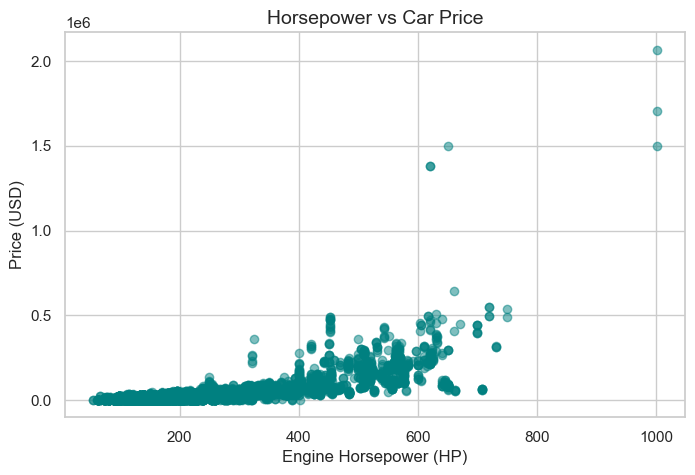

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df['Engine HP'], df['MSRP'], alpha=0.5, color='teal')
plt.title("Horsepower vs Car Price", fontsize=14)
plt.xlabel("Engine Horsepower (HP)")
plt.ylabel("Price (USD)")
plt.show()


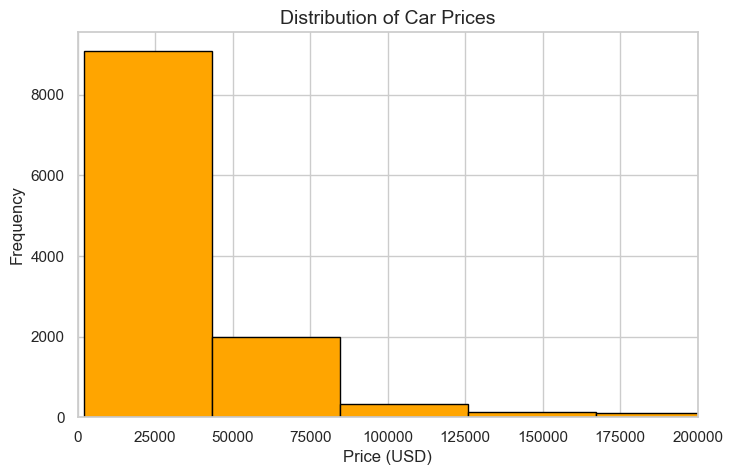

In [23]:
plt.figure(figsize=(8,5))
plt.hist(df['MSRP'], bins=50, color='orange', edgecolor='black')
plt.title("Distribution of Car Prices", fontsize=14)
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.xlim(0, 200000)  # optional, to focus on normal range
plt.show()


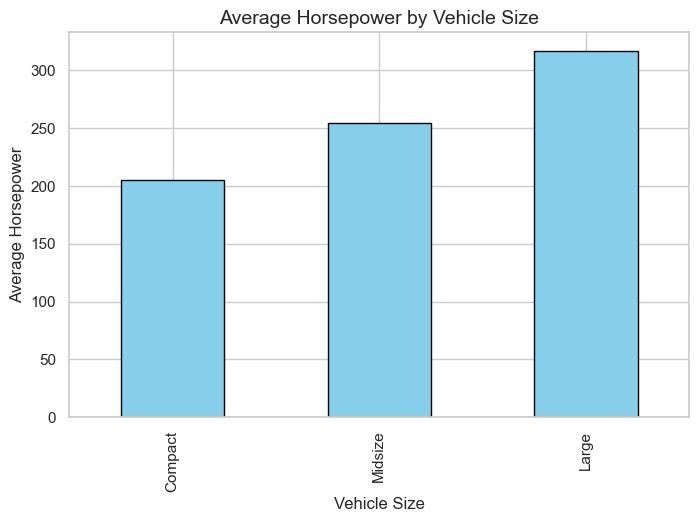

In [24]:
plt.figure(figsize=(8,5))
avg_hp = df.groupby('Vehicle Size')['Engine HP'].mean().sort_values()
avg_hp.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Average Horsepower by Vehicle Size", fontsize=14)
plt.ylabel("Average Horsepower")
plt.xlabel("Vehicle Size")
plt.show()


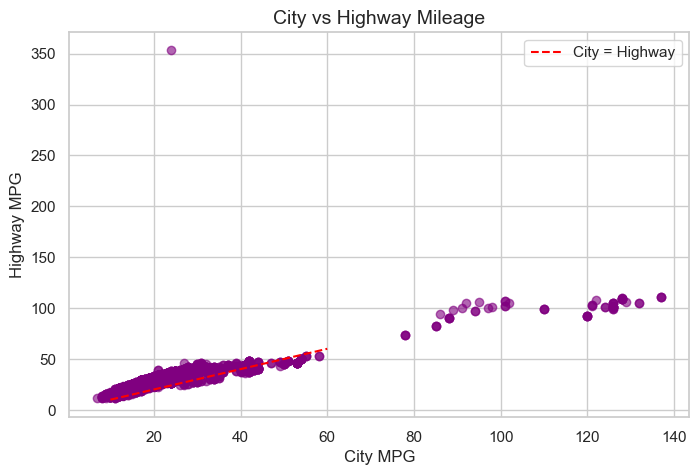

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df['city mpg'], df['highway MPG'], alpha=0.6, color='purple')
plt.plot([10, 60], [10, 60], color='red', linestyle='--', label='City = Highway')
plt.title("City vs Highway Mileage", fontsize=14)
plt.xlabel("City MPG")
plt.ylabel("Highway MPG")
plt.legend()
plt.show()


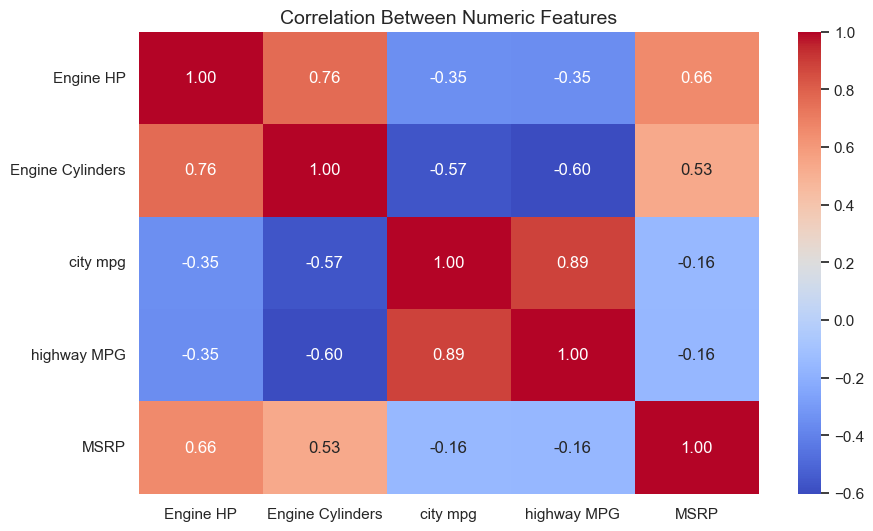

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df[['Engine HP', 'Engine Cylinders', 'city mpg', 'highway MPG', 'MSRP']].corr(),
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Numeric Features", fontsize=14)
plt.show()


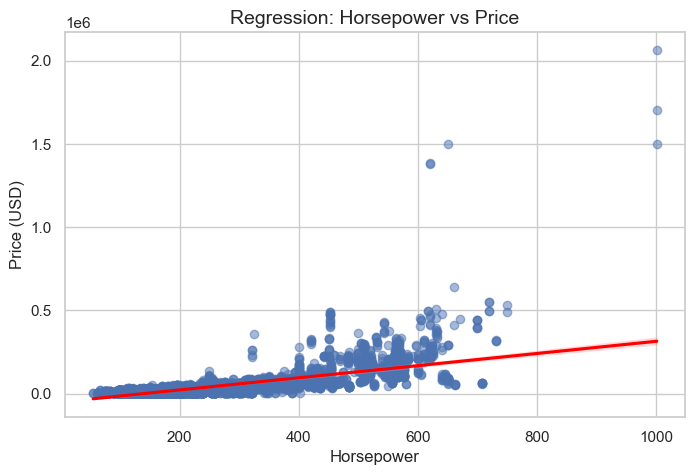

In [27]:
plt.figure(figsize=(8,5))
sns.regplot(x='Engine HP', y='MSRP', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Regression: Horsepower vs Price", fontsize=14)
plt.xlabel("Horsepower")
plt.ylabel("Price (USD)")
plt.show()
